In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns  
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("./datasets/hltv_playerStats-complete.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 20 columns):
nick                           803 non-null object
country                        803 non-null object
stats_link                     803 non-null object
teams                          803 non-null object
maps_played                    803 non-null int64
rounds_played                  803 non-null int64
kd_difference                  803 non-null int64
kd_ratio                       803 non-null float64
rating                         803 non-null float64
total_kills                    803 non-null int64
headshot_percentage            803 non-null float64
total_deaths                   803 non-null int64
grenade_damage_per_round       803 non-null float64
kills_per_round                803 non-null float64
assists_per_round              803 non-null float64
deaths_per_round               803 non-null float64
teammate_saved_per_round       803 non-null float64
saved_by_teammate_per_rou

In [4]:
df.drop(columns=["stats_link", "impact"], inplace=True)
df.isna().sum()

nick                           0
country                        0
teams                          0
maps_played                    0
rounds_played                  0
kd_difference                  0
kd_ratio                       0
rating                         0
total_kills                    0
headshot_percentage            0
total_deaths                   0
grenade_damage_per_round       0
kills_per_round                0
assists_per_round              0
deaths_per_round               0
teammate_saved_per_round       0
saved_by_teammate_per_round    0
kast                           0
dtype: int64

In [5]:
df.describe()

,maps_played,rounds_played,kd_difference,kd_ratio,rating,total_kills,headshot_percentage,total_deaths,grenade_damage_per_round,kills_per_round,assists_per_round,deaths_per_round,teammate_saved_per_round,saved_by_teammate_per_round,kast
count,803.000000,803.000000,803.000000,803.000000,803.00000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,833.174346,21893.596513,585.465753,1.035430,1.01188,15142.087173,45.462017,14556.518057,4.061395,0.688904,0.131046,0.666949,0.096015,0.096862,70.112827
std,402.388811,10607.751477,1475.806605,0.092114,0.06656,7539.729631,8.416641,7018.031710,1.187467,0.044705,0.017702,0.030042,0.011236,0.013084,1.790944
min,374.000000,9498.000000,-6238.000000,0.740000,0.77000,5530.000000,23.600000,5994.000000,1.400000,0.520000,0.080000,0.530000,0.040000,0.060000,63.300000
25%,500.500000,13227.000000,-283.000000,0.980000,0.97000,9092.500000,40.500000,8842.500000,3.200000,0.660000,0.120000,0.650000,0.090000,0.090000,69.000000
50%,734.000000,19174.000000,358.000000,1.030000,1.01000,13132.000000,47.300000,12603.000000,3.900000,0.690000,0.130000,0.670000,0.100000,0.100000,70.100000
75%,1059.000000,27881.000000,1313.500000,1.090000,1.05000,19214.000000,51.450000,18226.500000,4.800000,0.720000,0.140000,0.690000,0.100000,0.110000,71.400000
max,2169.000000,56914.000000,8864.000000,1.450000,1.27000,40884.000000,68.400000,38351.000000,9.100000,0.860000,0.180000,0.750000,0.140000,0.160000,76.300000


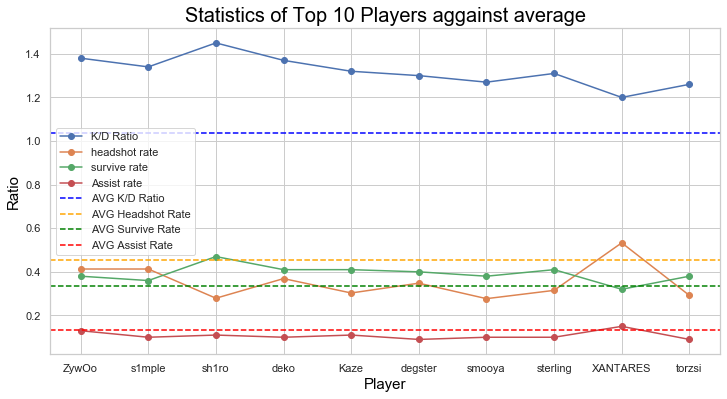

In [6]:
# Calculate min/max/average values of columns kd_ratio, rating, headshot_percentage, assists_per_round
# deaths_per_round, teammate_saved_per_round, 	saved_by_teammate_per_round, kast


avg_kd_ratio = df["kd_ratio"].mean()
avg_rating = df["rating"].mean()
avg_headshot_rate = df["headshot_percentage"].mean() / 100
avg_assists_per_round = df["assists_per_round"].mean()

avg_deaths_per_round = df["deaths_per_round"].mean()
avg_survive_rate = 1 - avg_deaths_per_round

avg_teammate_saved_per_round = df["teammate_saved_per_round"].mean()
avg_saved_by_teammate_per_round = df["saved_by_teammate_per_round"].mean()
avg_kast = df["kast"].mean()



df_sorted_rating = df.sort_values(by="rating", ascending=False)
top_10_player = df_sorted_rating.head(10)


sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(top_10_player['nick'], top_10_player['kd_ratio'], label='K/D Ratio', marker='o')
ax.plot(top_10_player['nick'], top_10_player['headshot_percentage']/100, label='headshot rate', marker='o')
ax.plot(top_10_player['nick'], 1 - top_10_player['deaths_per_round'], label='survive rate', marker='o')
ax.plot(top_10_player['nick'], top_10_player['assists_per_round'], label='Assist rate', marker='o')


# Reference Lines
ax.axhline(avg_kd_ratio, color='blue', linestyle='--', label='AVG K/D Ratio')
ax.axhline(avg_headshot_rate, color='orange', linestyle='--', label='AVG Headshot Rate')
ax.axhline(avg_survive_rate, color='green', linestyle='--', label='AVG Survive Rate')
ax.axhline(avg_assists_per_round, color='red', linestyle='--', label='AVG Assist Rate')

ax.set_xlabel('Player', fontsize=15, color="black")
ax.set_ylabel('Ratio', fontsize=15, color="black")
ax.set_title('Statistics of Top 10 Players aggainst average', size=20, color="black")
ax.legend()

plt.xticks(rotation=0)
plt.savefig("AVG.png")
plt.show()


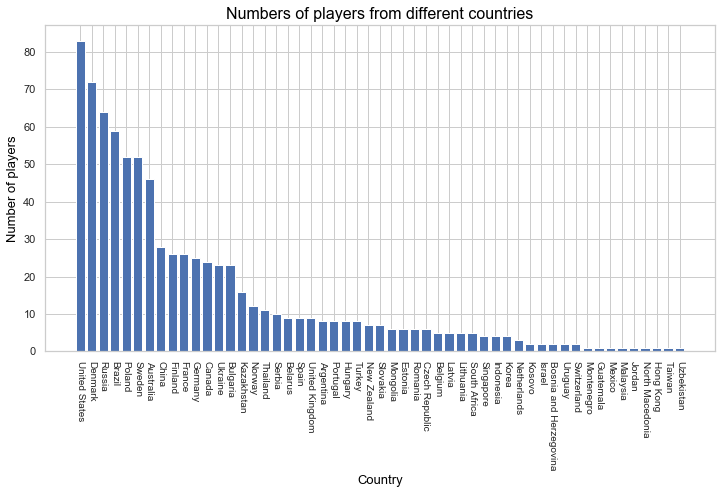

In [7]:
# Draw the sorted bar charts for query: Which counties are these pro players from? 
country_counts = df["country"].value_counts()
plt.figure(figsize=(12,6))
plt.bar(country_counts.index, country_counts)
plt.title('Numbers of players from different countries', size=16, color='black')
plt.xlabel('Country', fontsize=13, color='black')
plt.ylabel('Number of players', fontsize=13, color='black')
plt.xticks(fontsize=10, rotation=-90)
plt.savefig("Bar.png")
plt.show()

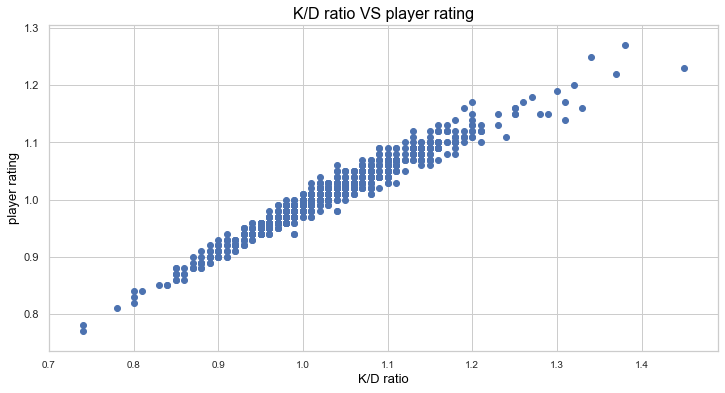

In [8]:
# Draw scatter chart for query: Is there a correlation between K/D ratio and player rating?
plt.figure(figsize=(12,6))
plt.scatter(df["kd_ratio"], df["rating"])
plt.title('K/D ratio VS player rating', size=16, color='black')
plt.xlabel('K/D ratio', fontsize=13, color='black')
plt.ylabel('player rating', fontsize=13, color='black')
plt.xticks(fontsize=10, rotation=0)
plt.savefig("Scatter.png")
plt.show()

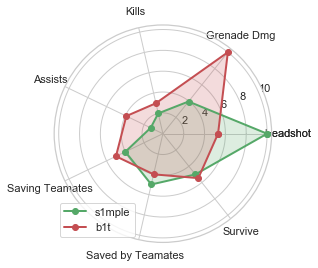

In [9]:
# Draw radar chart for query: How do the statistics of a specific player differ from those of another player?
normalize_df = df
key_list = ["kd_ratio","headshot_percentage", "kills_per_round",
            "assists_per_round", "grenade_damage_per_round",
            "teammate_saved_per_round","saved_by_teammate_per_round"]
normalize_df[key_list] = (df[key_list] - df[key_list].min())/(df[key_list].max() - df[key_list].min())
normalize_df["survive_per_round"] = 1 - normalize_df["deaths_per_round"]
normalize_df["survive_per_round"] = (df["survive_per_round"] - df["survive_per_round"].min())/(df["survive_per_round"].max() - df["survive_per_round"].min())
key_list.append("survive_per_round")
normalize_df[key_list] = normalize_df[key_list]*10 # rerange each score into the domin 0-10

num_score = 7
score_label = np.array(["Headshot", "Grenade Dmg", "Kills", "Assists", "Saving Teamates", "Saved by Teamates", "Survive"])
angles = np.linspace(0, 2*np.pi, num_score, endpoint=False)
normalize_df["kills_per_round_"] = normalize_df["kills_per_round"]
angles = np.concatenate((angles, [angles[0]]))
score_label = np.concatenate((score_label, [score_label[0]]))



score_list =  ["kills_per_round", "headshot_percentage", "assists_per_round", 
               "grenade_damage_per_round","teammate_saved_per_round",
               "saved_by_teammate_per_round", "survive_per_round", "kills_per_round_"]

# Find record by in-game nickname of two players 
player_name_A = "s1mple"
player_name_B = "b1t"
player_index_A = normalize_df.loc[df["nick"] == player_name_A].index
player_index_B = normalize_df.loc[df["nick"] == player_name_B].index


plt.subplot(111,polar=True)
plt.plot(angles, np.squeeze(normalize_df[score_list].loc[player_index_A]), "bo-", color="g", linewidth=2, label=player_name_A)
plt.fill(angles, np.squeeze(normalize_df[score_list].loc[player_index_A]), facecolor="g", alpha=0.2)
plt.plot(angles, np.squeeze(normalize_df[score_list].loc[player_index_B]), "bo-", color="r", linewidth=2, label=player_name_B)
plt.fill(angles, np.squeeze(normalize_df[score_list].loc[player_index_B]), facecolor="r", alpha=0.2)
plt.thetagrids(angles*180/np.pi, score_label)
plt.grid(True)
plt.legend()
plt.savefig("Radar.png")
plt.show()

